In [44]:
import json
import scipy.stats as stats
import numpy as np

# Load the data
methods = [
    'gptj_ft_edit',
    'gptj_ike_edit',
    'gptj_rome_edit',
    'gptj_no_edit',
    'llama2_chat_ft_edit',
    'llama2_chat_ike_edit',
    'llama2_chat_rome_edit',
    'llama2_chat_no_edit'
]

model = 'gpt-3.5-turbo-0613'
analysis_data = {
    k: json.load(open(f'../results/survey_{k}_{model}.json')) for k in methods
}

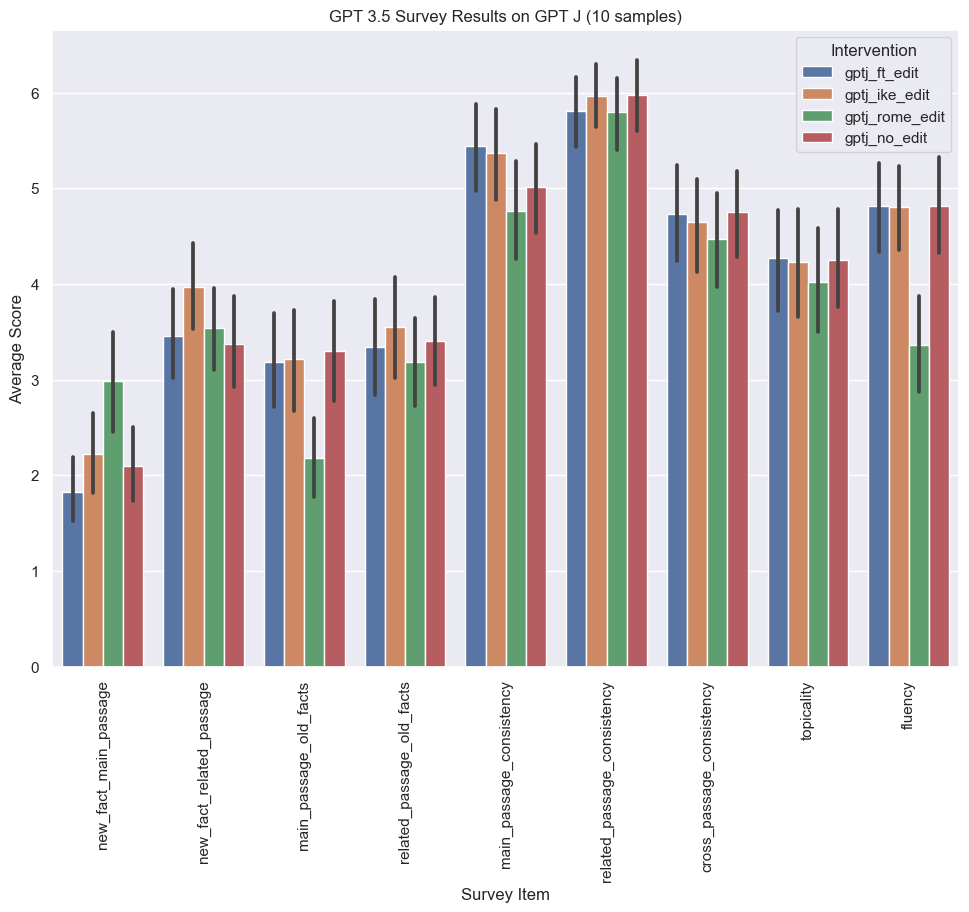

In [45]:
# bar plot with two dicts of str, list
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# plot 
plot_dfs = []
for method, data in analysis_data.items():
    if 'llama2' in method:
        continue
    for label, scores in data.items():
        for score in scores:
            plot_dfs.append({
                'label': label,
                'score': score,
                'Intervention': method
            })


plot_df = pd.DataFrame(plot_dfs)

# increase size of plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='label', y='score', hue='Intervention', data=plot_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('GPT 3.5 Survey Results on GPT J (10 samples)')
ax.set_xlabel('Survey Item')
ax.set_ylabel('Average Score')

# save plot 
fig = ax.get_figure()
fig.savefig('../results/survey_results_gpt3.5_gptj_interventions.png', dpi=300, bbox_inches='tight')

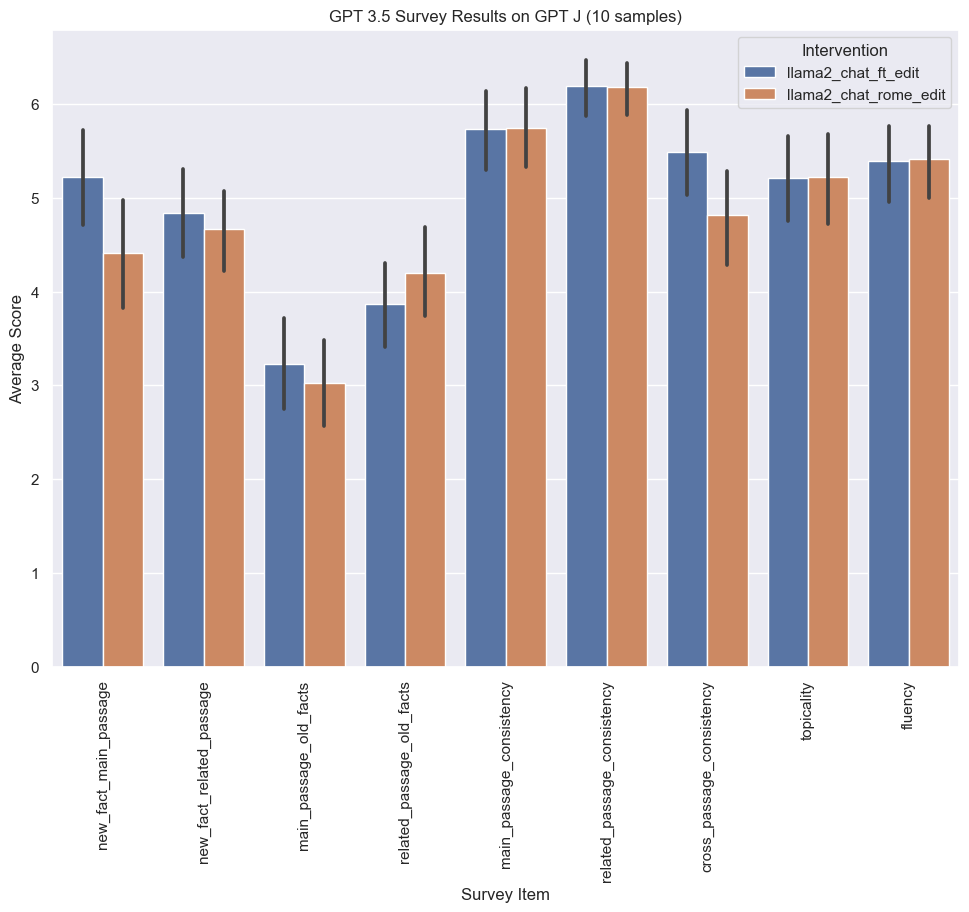

In [46]:
# bar plot with two dicts of str, list
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# plot 
plot_dfs = []
for method, data in analysis_data.items():
    if 'gptj' in method:
        continue
    for label, scores in data.items():
        for score in scores:
            plot_dfs.append({
                'label': label,
                'score': score,
                'Intervention': method
            })


plot_df = pd.DataFrame(plot_dfs)

# increase size of plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='label', y='score', hue='Intervention', data=plot_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('GPT 3.5 Survey Results on GPT J (10 samples)')
ax.set_xlabel('Survey Item')
ax.set_ylabel('Average Score')

# save plot 
fig = ax.get_figure()
fig.savefig('../results/survey_results_gpt3.5_gptj_interventions.png', dpi=300, bbox_inches='tight')

In [54]:
# print out the results in a table grouped by intervention and model
table_dfs =[]
for method, data in analysis_data.items():
    base_model = method.split('_')[0]
    for label, scores in data.items():
        for score in scores:
            table_dfs.append({
                'label': label,
                'score': score,
                'Intervention': method,
                'Model': base_model
            })


table_df = pd.DataFrame(table_dfs)
# the columns should be the labels, the rows should be the interventions, and the values should be the mean scores
# the index should be the model
table_df.pivot_table(index=['Model','Intervention'], columns='label', values='score', aggfunc=np.mean)



label                         cross_passage_consistency   fluency  \
Model  Intervention                                                 
gptj   gptj_ft_edit                            4.736264  4.811111   
       gptj_ike_edit                           4.644444  4.806452   
       gptj_no_edit                            4.755556  4.815217   
       gptj_rome_edit                          4.471910  3.362637   
llama2 llama2_chat_ft_edit                     5.489362  5.391753   
       llama2_chat_rome_edit                   4.819149  5.410526   

label                         main_passage_consistency  \
Model  Intervention                                      
gptj   gptj_ft_edit                           5.439560   
       gptj_ike_edit                          5.369565   
       gptj_no_edit                           5.010638   
       gptj_rome_edit                         4.764045   
llama2 llama2_chat_ft_edit                    5.734694   
       llama2_chat_rome_edit                  5.747368   

label                         main_passage_old_facts  new_fact_main_passage  \
Model  Intervention                                                           
gptj   gptj_ft_edit                         3.181818               1.826087   
       gptj_ike_edit                        3.215909               2.225806   
       gptj_no_edit                         3.303371               2.097826   
       gptj_rome_edit                       2.179775               2.988889   
llama2 llama2_chat_ft_edit                  3.231579               5.218750   
       llama2_chat_rome_edit                3.020833               4.406593   

label                         new_fact_related_passage  \
Model  Intervention                                      
gptj   gptj_ft_edit                           3.455556   
       gptj_ike_edit                          3.967033   
       gptj_no_edit                           3.369565   
       gptj_rome_edit                         3.538462   
llama2 llama2_chat_ft_edit                    4.833333   
       llama2_chat_rome_edit                  4.670213   

label                         related_passage_consistency  \
Model  Intervention                                         
gptj   gptj_ft_edit                              5.804348   
       gptj_ike_edit                             5.968085   
       gptj_no_edit                              5.978022   
       gptj_rome_edit                            5.800000   
llama2 llama2_chat_ft_edit                       6.193878   
       llama2_chat_rome_edit                     6.178947   

label                         related_passage_old_facts  topicality  
Model  Intervention                                                  
gptj   gptj_ft_edit                            3.340659    4.271739  
       gptj_ike_edit                           3.553191    4.230769  
       gptj_no_edit                            3.406593    4.255319  
       gptj_rome_edit                          3.179775    4.021505  
llama2 llama2_chat_ft_edit                     3.865979    5.206186  
       llama2_chat_rome_edit                   4.200000    5.221053

In [49]:
table_df.pivot_table(index=['Model','Intervention'], columns='label', values='score', aggfunc=np.std)

label                         cross_passage_consistency   fluency  \
Model  Intervention                                                 
gptj   gptj_ft_edit                            2.402939  2.233023   
       gptj_ike_edit                           2.518744  2.183227   
       gptj_no_edit                            2.235119  2.390132   
       gptj_rome_edit                          2.454541  2.469892   
llama2 llama2_chat_ft_edit                     2.242045  2.064364   
       llama2_chat_rome_edit                   2.552514  1.975891   

label                         main_passage_consistency  \
Model  Intervention                                      
gptj   gptj_ft_edit                           2.232133   
       gptj_ike_edit                          2.271260   
       gptj_no_edit                           2.320987   
       gptj_rome_edit                         2.490995   
llama2 llama2_chat_ft_edit                    2.180282   
       llama2_chat_rome_edit                  2.192678   

label                         main_passage_old_facts  new_fact_main_passage  \
Model  Intervention                                                           
gptj   gptj_ft_edit                         2.375863               1.587096   
       gptj_ike_edit                        2.470278               2.121981   
       gptj_no_edit                         2.506376               1.933282   
       gptj_rome_edit                       2.014503               2.528465   
llama2 llama2_chat_ft_edit                  2.429660               2.563727   
       llama2_chat_rome_edit                2.289469               2.792761   

label                         new_fact_related_passage  \
Model  Intervention                                      
gptj   gptj_ft_edit                           2.259368   
       gptj_ike_edit                          2.287408   
       gptj_no_edit                           2.276094   
       gptj_rome_edit                         2.161829   
llama2 llama2_chat_ft_edit                    2.452353   
       llama2_chat_rome_edit                  2.225890   

label                         related_passage_consistency  \
Model  Intervention                                         
gptj   gptj_ft_edit                              1.768088   
       gptj_ike_edit                             1.713025   
       gptj_no_edit                              1.738313   
       gptj_rome_edit                            1.879517   
llama2 llama2_chat_ft_edit                       1.510500   
       llama2_chat_rome_edit                     1.465772   

label                         related_passage_old_facts  topicality  
Model  Intervention                                                  
gptj   gptj_ft_edit                            2.390815    2.639944  
       gptj_ike_edit                           2.512836    2.671150  
       gptj_no_edit                            2.371020    2.501338  
       gptj_rome_edit                          2.347928    2.754358  
llama2 llama2_chat_ft_edit                     2.374469    2.327096  
       llama2_chat_rome_edit                   2.443402    2.357329

In [48]:
# perform pairwise mann whitney u tests on edit vs no edit
from scipy import stats

no_edit = analysis_data['gptj_no_edit']
for method, data in analysis_data.items():
    if 'no_edit' in method:
        continue
    print(method)
    for label, scores in data.items():
        print(label)
        print("Two-sided", stats.mannwhitneyu(no_edit[label], scores, alternative='two-sided'))
        print("Less", stats.mannwhitneyu(no_edit[label], scores, alternative='less'))
        print("Greater", stats.mannwhitneyu(no_edit[label], scores, alternative='greater'))
        print('\n')

gptj_ft_edit
new_fact_main_passage
Two-sided MannwhitneyuResult(statistic=4440.0, pvalue=0.508546053302923)
Less MannwhitneyuResult(statistic=4440.0, pvalue=0.7467474367207296)
Greater MannwhitneyuResult(statistic=4440.0, pvalue=0.2542730266514615)


new_fact_related_passage
Two-sided MannwhitneyuResult(statistic=4109.0, pvalue=0.9293977462363815)
Less MannwhitneyuResult(statistic=4109.0, pvalue=0.46469887311819075)
Greater MannwhitneyuResult(statistic=4109.0, pvalue=0.5364553651433525)


main_passage_old_facts
Two-sided MannwhitneyuResult(statistic=3926.0, pvalue=0.9767474808747758)
Less MannwhitneyuResult(statistic=3926.0, pvalue=0.5128496732161073)
Greater MannwhitneyuResult(statistic=3926.0, pvalue=0.4883737404373879)


related_passage_old_facts
Two-sided MannwhitneyuResult(statistic=4232.5, pvalue=0.7897981269861032)
Less MannwhitneyuResult(statistic=4232.5, pvalue=0.6062221925475302)
Greater MannwhitneyuResult(statistic=4232.5, pvalue=0.3948990634930516)


main_passage_consistenc

In [30]:
# TODO:
# - Add descriptive statistics
# - Add CI intervals
# - Explore distributions
# - Explore correlations
